['anexo.csv', 'anexo-grex.csv']

LEVELS: 

First version:  ['A2', 'B1', 'C1', 'C2', 'C1', 'A2', 'B1', 'B1', 'B2', 'C1', 'C2', 'C2', 'C2', 'A1', 'A2', 'A2', 'A2', 'A2', 'A2', 'A2', 'A1', 'A1', 'A1', 'A2', 'A1', 'B1', 'B2', 'B1', 'B1', 'B1', 'A1', 'A2', 'A1', 'A2', 'A2', 'A2', 'A2', 'A2', 'C2', 'C2', 'C2', 'A1', 'A2', 'B1', 'B1', 'B1', 'B2', 'A1', 'B1', 'C1', 'C1', 'A2', 'A2', 'B1', 'B1', 'B1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'B1', 'B1', 'B1', 'C1', 'C1', 'C2', 'C1', 'C1', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C1', 'A2', 'B2', 'B2', 'B1', 'B1', 'B1', 'B2', 'B2', 'B2', 'B1', 'B1', 'B1']

Second version: ['A2', 'A1', 'B2', 'C1', 'B2', 'A1', 'A2', 'A2', 'B1', 'B2', 'B2', 'B2', 'C1', 'A1', 'A2', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A2', 'A1', 'A1', 'A2', 'A2', 'A2', 'B1', 'A1', 'B1', 'A1', 'A2', 'A1', 'A1', 'A1', 'A2', 'B2', 'B2', 'B1', 'A2', 'B1', 'B2', 'B2', 'B2', 'B1', 'A2', 'C1', 'C1', 'C1', 'A2', 'A2', 'A2', 'A2', 'A2', nan, nan, nan, nan, nan, nan, 'B1', 'B1', 'B1', 'B2'

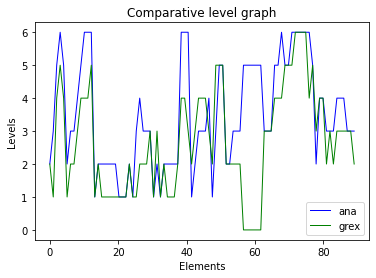

In [8]:
from sklearn.metrics import cohen_kappa_score
import pandas as pd
import numpy as np
import pylab as pl


#-- Variable of annex levels
annex1Level = ''
annex2Level = ''

#-- List of files
list_files = []

#-- Get name files
anexo1 = ("anexo.csv")
anexo2 = ("anexo-grex.csv")
list_files.append(anexo1)
list_files.append(anexo2)
print(list_files)

#-- Read csv files
for file in list_files:
        index = list_files.index(file)
        reader = pd.read_csv(file)
        if index == 0:
            annex1Level = (reader.iloc[1:, 2].to_list())
        else:
            annex2Level = (reader.iloc[1:, 2].to_list())
print('\nLEVELS: ')      
print('\nFirst version:  ' + str(annex1Level))
print('\nSecond version: ' + str(annex2Level))
        
#-- Assign value
list_annex = [annex1Level, annex2Level]
for i in range(0, len(list_annex)):
    for value in range(0, len(list_annex[i])):
        #print(list_annex[i][value])
        if (list_annex[i][value] == 'A1'):
            list_annex[i][value] = 1
        elif (list_annex[i][value] == 'A2'):
            list_annex[i][value] = 2
        elif (list_annex[i][value] == 'B1'):
            list_annex[i][value] = 3
        elif (list_annex[i][value] == 'B2'):
            list_annex[i][value] = 4
        elif (list_annex[i][value] == 'C1'):
            list_annex[i][value] = 5
        elif (list_annex[i][value] == 'C2'):
            list_annex[i][value] = 6
        else:
            list_annex[i][value] = 0


            
#-- Calculating the kappa coefficiet
print('\nASSIGNMENTS: ')
print('\nFirst version:  ' + str(annex1Level))
print('\nSecond version: ' + str(annex2Level))

kappa = cohen_kappa_score(annex1Level, annex2Level)
print('\nKappa coefficient: ' + str(kappa))
      


#-- Draw graph
X = np.linspace(0, 89, 89, endpoint=True)
pl.plot(X, annex1Level, color="blue", linewidth=1.0, linestyle="-", label= "ana")
pl.plot(X, annex2Level, color="green", linewidth=1.0, linestyle="-", label = "grex")

#-- Show legend
pl.legend(loc='lower right')

pl.title("Comparative level graph")  #-- Sets the title of the graph
pl.xlabel("Elements")  #- Sets the title of the x-axis
pl.ylabel("Levels")   #-- Sets the title of the y-axis

pl.savefig("Anexo-kappa.jpg")

#-- Show result on screen
pl.show()

